# Import Libraries 

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Read The Dataset 
### ( with cheack first and last five rows ).

In [2]:
data = pd.read_csv ('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### decribe columns in the dataset

age: The patients age in years

sex: The patients gender(1=male; 0=female)

cp: Chest pain type, *Value 1: typical angina *Value 2: atypical angina *Value 3: non-anginal pain *Value 4: asymptomatic

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: Serum cholestoral in mg/dl

fbs: Fasting blood sugar > 120 mg/dl? (1=true; 0=false)

restecg: Resting electrocardiographic results *Value 0: normal *Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) *Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: Maximum heart rate achieved

exang: Chest pain(angina) after exercise? (1=yes; 0=no)

thal: Not described *Value 3=normal *Value 6=treated defect *Value 7=reversible defect

num: Target *Value 0: less than 50% narrowing of coronary arteries(no heart disease) *Value 1,2,3,4: >50% narrowing. The value indicates the stage of heart disease


# Shape of dataset
### ( Number of rows and columns )

In [4]:
data.shape

(1025, 14)

In [5]:
print ("Number Of Data's Rows Is : " , data.shape[0])
print ("Number Of Data's columns Is : " , data.shape[1])

Number Of Data's Rows Is :  1025
Number Of Data's columns Is :  14


# Information about dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* Notice: No Null values in dataset

# Check Duplicate Data 

In [7]:
data_duplicate = data.duplicated().any()
data_duplicate

True

# Drop Duplicate Data

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(302, 14)

# Statistical Information 

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Show Correlation
## ( Matrix & Heatmap)

In [11]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

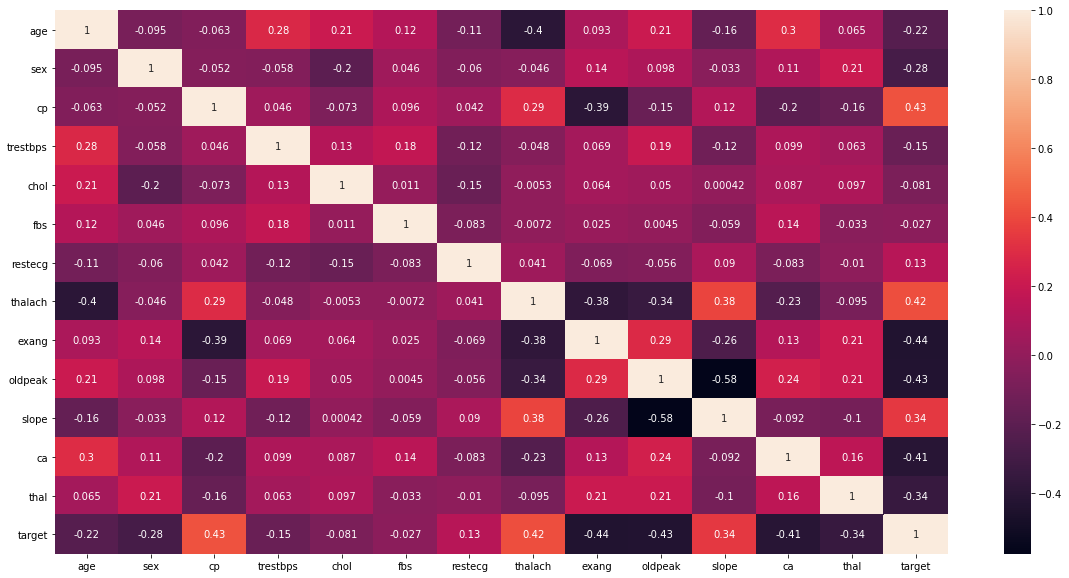

In [12]:
plt.figure(figsize= (20,10))
sns.heatmap(data.corr() , annot = True)

# Show how many people have heart diseases & how many people don't have heart diseases 

In [13]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

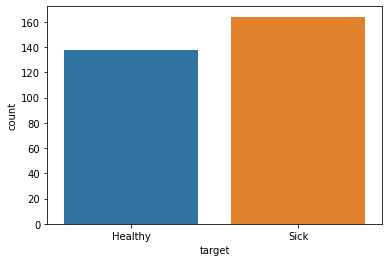

In [58]:
sns.countplot( x = data['target'])
plt.xticks([0,1],['Healthy','Sick'])
plt.show()

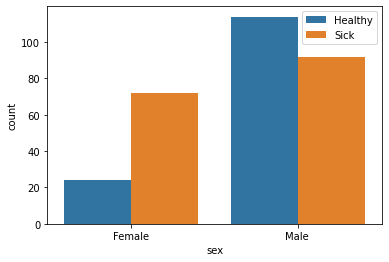

In [15]:
sns.countplot (x = "sex" , hue = 'target' , data = data)
plt.xticks ([1,0] , ['Male ', 'Female'])
plt.legend ( labels = ['Healthy','Sick'])
plt.show()

# Check Chest Pain Type

### 0 => Typical angina 
### 1 =>  Atypical angina
### 2 => Non - anginal pain
### 3 => Asymptomatic

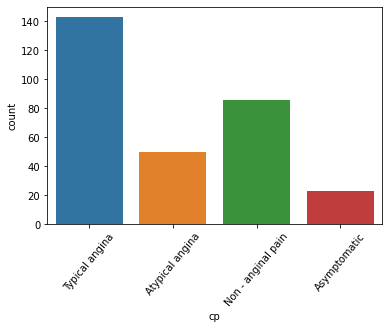

In [57]:
sns.countplot( x = data['cp'])
plt.xticks ([0,1,2,3] , ["Typical angina","Atypical angina","Non - anginal pain","Asymptomatic"])
plt.xticks (rotation = 50)
plt.show()

# Show Chest Pain According To Target

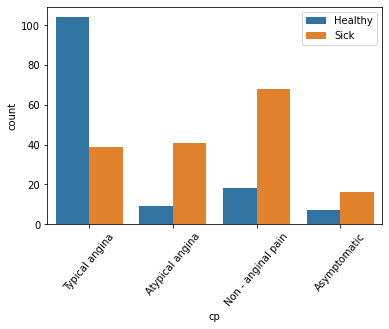

In [17]:
sns.countplot(x = "cp" , hue = "target" , data = data )
plt.xticks ([0,1,2,3] , ["Typical angina","Atypical angina","Non - anginal pain","Asymptomatic"])
plt.xticks (rotation = 50)
plt.legend(labels = ['Healthy','Sick'])
plt.show()

# Show Fasting Blood Sugar According To Target

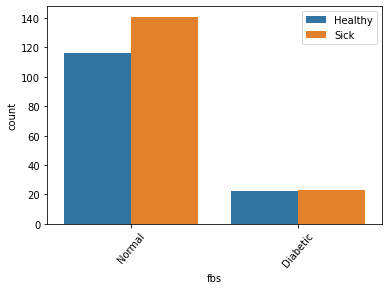

In [18]:
sns.countplot(x = "fbs" , hue = "target" , data = data )
plt.xticks ([0,1] , ["Normal","Diabetic"])
plt.xticks (rotation = 50)
plt.legend(labels = ['Healthy','Sick'])
plt.show()

 # Compare Resting Blood pressure As Per Sex 

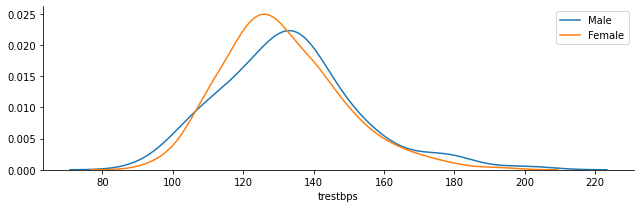

In [19]:
gen = sns.FacetGrid (data,hue = 'sex' , aspect=3)
gen.map(sns.kdeplot,'trestbps')
plt.legend(labels = ['Male',"Female"])
plt.show()

# Split dataset to dependent  & independent 

In [25]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 13].values

In [29]:
x.shape

(302, 13)

In [30]:
y.shape

(302,)

# Split dataset to test  & train 

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 ,random_state = 0)

# Apply Logistic Regression ( Classification ) On The Dataset

In [42]:
classification = LogisticRegression(max_iter=3000)

In [43]:
classification.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

# Check The Score Of Test  & Train 

In [67]:
train_score = classification.score(x_train,y_train)
train_score

0.8506224066390041

In [68]:
test_score = classification.score(x_test,y_test)
test_score

0.8524590163934426